# Homework 2, CS585 Fall 2019 (due Mar 6th, 2020)

### **This HW is due on Mar 6th, 2020, submitted via Gradescope as a PDF (File > Print > Save as PDF). 150 points total.**

#### IMPORTANT: After copying this notebook to your Google Drive, please add a link to it below. To get a publicly-accessible link, hit the *Share* button at the top right, then click "Get shareable link" and copy over the result. If you fail to do this, you will receive no credit for this homework!
LINK: https://colab.research.google.com/drive/1n6U1fth6kahl4B7e6BP0fZ3j6cAzhNlp

##### How to do this problem set:

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out all code-blocks that say `IMPLEMENT ME` or `ENTER CODE HERE`.

- For all of the textual answers you have to fill out have placeholder text which says  `Answer in one or two sentences here` or `YOUR ANSWER HERE` For each question, you need to replace the placeholder text with your answer.
 
- The neural language model may take up to 10 minutes to train and the allenNLP models can take up to 30 minutes to finetune, so **start early**! The rest of the cells are designed so that you can run in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### How to submit this problem set:
- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Print -> Save as PDF) and upload to Gradescope.
  
- **Important:** check your PDF before you turn it in to Gradescope to make sure it exported correctly. If Colab gets confused about your syntax, it will sometimes terminate the PDF creation routine early.

- When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One handy way to do this is by clicking `Runtime -> Run All` in the notebook menu.

##### Academic honesty 

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a serious case of cheating. See the course page for honesty policies.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.



## Q0. Relu Dead Neuron (20 points)
Relu is an activation funciton commonly used in many neural network architectures. Unfortunately, Relu units can be fragile at times as in the following scenario. Please complete the following question:

[INLP ch.\ 3, \#8, all of (a), (b), and (c).]

(You can insert mathematical symbols by using the double dollar sign "$$" just like in latex)

Considering the following two layer feed forward network whose output is $y$ and $x\in \{0,1\}^D$.
$$z_i\ =\ \text{ReLU}(\theta^{(x\rightarrow z)}_i.x\ +\ b_i)$$
$$y\ =\ \theta^{(z\rightarrow y)}.z$$

**Solution:**

**a)** 

A node $z_i$ is considered dead when the gradient becomes zero during training and hence no further updates happen during backpropagation which affects the nodes beyond it. This is when the input to the ReLU becomes negative as the gradient of ReLU function is 0 when the input to it is negative.

We can write the ReLU function and its gradient as below:

$$f(x) = \left \{ \begin{array}{rcl} 0 & \mbox{for} & x < 0\\ x & \mbox{for} & x \ge 0\end{array} \right.  \ \ \ \ \&\ \ \ \ f'(x) = \left \{ \begin{array}{rcl} 0 & \mbox{for} & x < 0\\ 1 & \mbox{for} & x > 0\end{array} \right.$$


Hence from our loss function, we get the below,

$$\left(\theta^{(x\rightarrow z)}_i.x\ +\ b_i\right)\ <\ 0\ \ \ \implies \theta^{(x\rightarrow z)}_i.x\ <\ - b_i$$

Since we know that $x\ \in\ \{0,1\}^D$, max($x$) would be 1 element wise. Thus we can bring a stricter bound for the neurron to be dead as below,

$$\sum^D_{j=1} \theta^{(x\rightarrow z)}_{i,j}\times\ x_j\ <\ -b_i\ \implies\ \sum^D_{j=1} \theta^{(x\rightarrow z)}_{i,j}\ <\ -b_i$$


**b)** 

Given that $\frac{\partial \mathcal{l}}{\partial y} = 1$,

$$\frac{\partial l}{\partial b_i}\ =\ \frac{\partial l}{\partial y}.\frac{\partial y}{\partial z_i}.\frac{\partial z_i}{\partial b_i}\ \ \ \ \&\ \ \ \ \frac{\partial l}{\partial \theta^{(x\rightarrow z)}_{j,i}}\ =\ \frac{\partial l}{\partial y}.\frac{\partial y}{\partial z_i}.\frac{\partial z_i}{\partial \theta^{(x\rightarrow z)}_{j,i}}$$

From the above, we derive the following to help achieve our objective:

$$\frac{\partial z_i}{\partial b_i}\ =\ \delta\left[\theta^{(x\rightarrow z)}_i.x\ +\ b_i\right]\ \ \ \ \ ; \ \ \ \frac{\partial y}{\partial z_i}\ =\ \theta^{(z\rightarrow y)}\ \ \ \ \ ; \ \ \ \frac{\partial z_i}{\partial \theta^{(x\rightarrow z)}_{j,i}}\ =\ x_j.\delta\left[\theta^{(x\rightarrow z)}_i.x\ +\ b_i\right]$$

$$$$

where,
$$\delta[\phi] =
    \begin{cases}
            1, &         \text{if } \phi > 0,\\
            0, &         \text{if } \phi < 0.
    \end{cases}$$

Hence substituting in the equations we get,

$$\frac{\partial l}{\partial b_i}\ =\ \theta^{(z\rightarrow y)}_i.\delta\left[\theta^{(x\rightarrow z)}_i.x\ +\ b_i\right]$$

$$\frac{\partial l}{\partial \theta^{(x\rightarrow z)}_{j,i}}\ =\ \theta^{(z\rightarrow y)}.x_j.\delta\left[\theta^{(x\rightarrow z)}_i.x\ +\ b_i\right]$$


**c)** 

As can be seen in part (b), gradient becomes 0 when,

$$\theta^{(x\rightarrow z)}_i.x\ +\ b_i\ <\ 0$$

Hence, in a gradient based learning where we update the parameters ($\theta^{x\rightarrow z}, \theta^{z\rightarrow y}$) by the following:


$$ \theta^{x\rightarrow z}_{next} \leftarrow \theta^{x\rightarrow z}_{prev} + \lambda_1.\frac{\partial l}{\partial \theta^{x\rightarrow z}}\ \ \ \ ;\ \ \ \theta^{z\rightarrow y}_{next} \leftarrow \theta^{z\rightarrow y}_{prev} + \lambda_2.\frac{\partial l}{\partial \theta^{z\rightarrow y}}$$


As the gradients become zero the parameter values get stagnant and the corresponding gradient also remains at 0 and hence no learning can further occur through that neuron and is hence considered dead as it will not affect the training of the model parameters irrespective of the further inputs it reads.



Also from part (a), if the strict upper bound is breached, irrespective of the input to the model, the neuron will never be activated due to a 0 gradient which will make the neuron and succeeding neurons dead throughout its tenure.

## Q1. N-gram Language model (40pts)


To get started with the rest of the assignment, first run the following cell to create a PyDrive client and download data to your own Google Drive.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

success!


In [0]:
import torch, pickle, os, sys, random, time
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn, optim
from collections import *
import numpy as np


In [0]:
# Download wikitext02 data
data = {'test': '', 'train': '', 'valid': ''}
f_id = {'wiki.test.tokens': '1T8yMDqCqrWVXYJiTqKe2q8hoyAD_rV84', 
        'wiki.train.tokens': '1itIse_TpmFq1I5y7mxuXtzljnRwoM8gF', 
        'wiki.valid.tokens': '1K3SV5p8gu19DgQZtRvCViGMb26NJ1scd'}

for fname in f_id:
  f = drive.CreateFile({'id' : f_id[fname]})
  f.GetContentFile(fname)
  with open(fname, 'r') as f_wiki:
    data[fname.split('.')[1]] = f_wiki.read().lower().split()

vocab = list(set(data['train']))

Now have a look at the data by running the below cell.

In [0]:
print('train : %s ...' % data['train'][:10])
print('dev : %s ...' % data['valid'][:10])
print('test : %s ...' % data['test'][:10])
print('first 10 words in vocab: %s' % vocab[:10])

train : ['=', 'valkyria', 'chronicles', 'iii', '=', 'senjō', 'no', 'valkyria', '3', ':'] ...
dev : ['=', 'homarus', 'gammarus', '=', 'homarus', 'gammarus', ',', 'known', 'as', 'the'] ...
test : ['=', 'robert', '<unk>', '=', 'robert', '<unk>', 'is', 'an', 'english', 'film'] ...
first 10 words in vocab: ['bethel', 'byblos', 'karen', 'dimension', 'branching', 'sachs', 'board', 'friary', 'heart', 'function']



### **Q1.1:** Train N-gram language model (15pts)

Complete the following *train_ngram_lm* function based on the following input/output specifications. If you've done it right, you should pass the tests in the cell below.

*Input:*
+ **data**: the data object created in the cell above that holds the tokenized Wikitext data
+ **order**: the order of the model (i.e., the "n" in "n-gram" model) If order=3, we compute $p(w_2 | w_0, w_1)$.

*Output:*
+ **lm**: A dictionary where the key is the history and the value is a probability distribution over the next word computed using the maximum likelihood estimate from the training data. Importantly, this dictionary should include *backoff* probabilities as well; e.g., for order=4, we want to store $p(w_3 | w_0,w_1,w_2)$ as well as $p(w_3|w_1,w_2)$ and $p(w_3|w_2)$. 

Each key should be a single string where the words that form the history have been concatenated using spaces. Given a key, its corresponding value should be a dictionary where each word type in the vocabulary is associated with its probability of appearing after the key. For example, the entry for the history 'w1 w2' should look like:

    
    lm['w1 w2'] = {'w0': 0.001, 'w1' : 1e-6, 'w2' : 1e-6, 'w3': 0.003, ...}
    
In this example, we also want to store `lm['w2']` and `lm['']`, which contain the bigram and unigram distributions respectively.

*Hint:* You might find the **defaultdict** and **Counter** classes in the **collections** module to be helpful.

In [0]:
def train_ngram_lm(data, order=3):
    """
        Train n-gram language model
    """
    # pad (order-1) special tokens to the left
    # for the first token in the text
    order -= 1
    data = ['<S>'] * order + data # 
    lm = defaultdict(Counter)
    for i in range(len(data) - order):
      words = data[i:i+order+1]
      word = data[i+order]
      for j in range(0,order+1,1):
        sub_key = ' '.join(words[j:-1])
        lm[sub_key][word] += 1
    for ki in lm.keys():
      tot = sum(lm[ki].values())
      for ski in lm[ki].keys():
        lm[ki][ski] /= tot
    return lm        

In [0]:
def test_ngram_lm():
  
    print('checking empty history ...')
    lm1 = train_ngram_lm(data['train'], order=1)
    assert '' in lm1, "empty history should be in the language model!"
    
    print('checking probability distributions ...')
    lm2 = train_ngram_lm(data['train'], order=2)
    sample = [sum(lm2[k].values()) for k in random.sample(list(lm2), 10)]
    assert all([a > 0.999 and a < 1.001 for a in sample]), "lm[history][word] should sum to 1!"
    
    print('checking lengths of histories ...')
    lm3 = train_ngram_lm(data['train'], order=3)
    assert len(set([len(k.split()) for k in list(lm3)])) == 3, "lm object should store histories of all sizes!"
    
    print('checking word distribution values ...')
    assert lm1['']['the'] < 0.064 and lm1['']['the'] > 0.062 and \
           lm2['the']['first'] < 0.017 and lm2['the']['first'] > 0.016 and \
           lm3['the first']['time'] < 0.106 and lm3['the first']['time'] > 0.105, \
           "values do not match!"
    
    print("Congratulations, you passed the ngram check!")
    
  
test_ngram_lm()

checking empty history ...
checking probability distributions ...
checking lengths of histories ...
checking word distribution values ...
Congratulations, you passed the ngram check!


### **Q1.2:** Generate text from n-gram language model (10pts)

Complete the following *generate_text* function based on these input/output requirements:

*Input:*

+ **lm**: the lm object, a dictionary you return from  the **train_ngram_lm** function
+ **vocab**: vocab is a list of unique word types in the training set computed already computed for you during data loading.
+ **context**: the input context string that you want to condition your language model on, should be a space-separated string of tokens
+ **order**: order of your language model (i.e., "n" in the n-gram model)
+ **num_tok**: number of tokens to be generated following the input context


*Output:*

+ generated text, should be a space-separated string
    
*Hint:*

After getting the next-word distribution given history, try using **[numpy.random.choice](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html)** to sample the next word from the distribution.

In [0]:
import numpy as np

In [0]:
# generate text
def generate_text(lm, vocab, context="he is the", order=3, num_tok=25):
    
    # The goal is to generate new words following the context
    # If context has more tokens than the order of lm, 
    # generate text that follows the last (order-1) tokens of the context
    # and store it in the variable `history`
    order -= 1
    history = context.split()[-order:]
    # `out` is the list of tokens of context
    # you need to append the generated tokens to this list
    out = context.split()    
    for i in range(num_tok):
      key = ' '.join(history)
      if key not in lm.keys():
        next_word = np.random.choice(vocab)
      else:
        next_word = np.random.choice(list(lm[key].keys()))
      context = ' '.join([context, next_word])
      history = context.split()[-order:]
      out = context.split()

    return ' '.join(out)

Now try to generate some texts! Read the texts generated by ngram language model with different orders

In [0]:
order = 1
generate_text(train_ngram_lm(data['train'], order=order), vocab, context='he is the', order=order)

'he is the vocalization carcetti moniteur natured gatwick palabras highlander usury shepherd andorian outdoors open ritualised 1142 1166 poker evaporation montenegrins dahl camden kramer soledad loftleidir suspicious hoot'

In [0]:
order = 2
generate_text(train_ngram_lm(data['train'], order=order), vocab, context='he is the', order=order)

'he is the scoring 7 rating due on 70 mph . philippe and enlarged portion by ellen intensified . raw and bourdais in 1856 at dalmeny and wendy'

In [0]:
order = 3
generate_text(train_ngram_lm(data['train'], order=order), vocab, context='he is the', order=order)

'he is the simple looks and <unk> seaplane which attempted to position his four star review for president he says effectively changed fashion in ireland was largely described'

In [0]:
order = 4
generate_text(train_ngram_lm(data['train'], order=order), vocab, context='he is the', order=order)

'he is the same and their philosophical views are similar : neither " pays much attention to death , because that \'s basic to all of the amino'

### Q1.3 : Complete *compute_perplexity* (15pts)
Now let's evaluate the models quantitively using the intrinsic metric **perplexity**. 

Recall perplexity is the inverse probability of the test text
$$\text{ppl}(w_1, \dots, w_n) = p(w_1, \dots, w_n)^{-\frac{1}{N}}$$

For an n-gram model, perplexity is computed by
$$\text{ppl}(w_1, \dots, w_n) = (\prod_i p(w_{i+n}|w_i^{i+n-1})^{-\frac{1}{N}}$$

To get rid of numerical issue, we usually compute through:
$$\text{ppl}(w_1, \dots, w_n) = \exp(-\frac{1}{N}\sum_i \log p(w_{i+n}|w_i^{i+n-1}))$$


*Input:*

+ **lm**: the language model you trained, still the object you returned from the **train_ngram_lm** function
+ **data**: test data
+ **vocab**: vocab
+ **order**: order of the lm

*Output:*

+ the perplexity of test data

*Hint:*

+ If the history is not in the **lm** object, back-off to (n-1) order history to check if it is in **lm**. If no history can be found, just use `1/|V|` where `|V|` is the size of vocabulary.

In [0]:
def compute_perplexity(lm, data, vocab, order=3):
    
    # pad according to order
    order -= 1
    data = ['<S>'] * order + data
    ppl = 0
    vocab = vocab + ['<S>']
    for i in range(len(data) - order):
      h, w = ' '.join(data[i: i+order]), data[i+order]
      """
      IMPLEMENT ME!
      # if h not in lm, back-off to n-1 gram and look up again

      """
      
      while (h not in lm.keys()) or (lm[h][w] == 0):
        if len(h.split()) == 1:
          h = ''
        else:
          h = ' '.join(h.split()[1:])
      
      ppl += np.log(lm[h][w])
    
    ppl = np.exp( (-1/(len(data) - order)) * ppl )

    return ppl    

Let's evaluate the language model with different orders. You should see a decrease in perplexity as the order increases. As a reference, the perplexity of the unigram, bigram, trigram, 4-gram language model should be around 795, 203, 141, 130 respectively.

In [0]:
for o in [1, 2, 3, 4]:
    lm = train_ngram_lm(data['train'], order=o)
    print('order {} ppl {}'.format(o, compute_perplexity(lm, data['test'], vocab, order=o)))
    

order 1 ppl 794.5377104541699
order 2 ppl 203.26492650337096
order 3 ppl 141.22462003506539
order 4 ppl 129.6418792167028


## Q2. Neural language models (60pts)


In this part of the homework, we'll be using PyTorch to play around with neural language models. First, a quick warm up by implementing backpropagation within a *scalar* neural network. Then, you'll implement a neural language model using PyTorch's built-in modules.

Firstly, run the cell below to import pytorch and set up the gradient checking functionality.

In [0]:
import torch
import torch.nn as nn
device = torch.device('cpu')

# checks equality between your gradients and those from autograd
def gradient_check(params, your_gradient):
    all_good = True
    for key in params.keys():
        if params[key].grad.size() != your_gradient[key].size():
            print('GRADIENT ERROR for parameter %s, SIZE ERROR\nyour size: %s\nactual size: %s\n'\
                % (key, your_gradient[key].size(), 
                   params[key].grad.size()))
            all_good = False
        elif not torch.allclose(params[key].grad, your_gradient[key], atol=1e-6):
            print('GRADIENT ERROR for parameter %s, VALUE ERROR\nyours: %s\nactual: %s\n'\
                % (key, your_gradient[key].detach(), 
                   params[key].grad))
            all_good = False
            
    return all_good

### Q2.1 Warm up with single neuron (5 pts)
The below cell trains a network with scalars (i.e., single neurons) in each layer on a small dataset of ten examples. We saw a similar architecture in the class notes. All you have to do is translate the partial derivatives we computed into code. The network is defined as:

<center>$\text{h} = \tanh(w_1 \cdot \text{input})$</center>

<center>$\text{pred} = \tanh(w_2 \cdot \text{h})$</center>

<center>$\text{L} = 0.5 \cdot (\text{target} - \text{pred})^2$</center>

If you run the cell below, you should see "GRADIENT ERRORS". Once you implement the partial derivatives $\frac{\partial{L}}{\partial{w_1}}$ and $\frac{\partial{L}}{\partial{w_2}}$ correctly, you will instead see a "SUCCESS" message. **Do NOT modify any code outside of the block marked "IMPLEMENT BACKPROP HERE"!**




In [0]:
# initialize model parameters
params = {}
params['w1'] = torch.randn(1, 1, requires_grad=True) # input > hidden with scalar weight w1
params['w2'] = torch.randn(1, 1, requires_grad=True) # hidden > output with scalar weight w2

# set up some training data
inputs = torch.randn(20, 1)
targets = inputs / 2

# training loop
all_good = True
for i in range(len(inputs)):
    
    ## forward prop, then compute loss.
    a = params['w1'] * inputs[i] # intermediate variable, following lecture notes
    hidden = torch.tanh(a)
    b = params['w2'] * hidden
    pred = torch.tanh(b)
    loss = 0.5 * (targets[i] - pred) ** 2 # compute square loss
    loss.backward() # runs autograd
    
    
    ####################
    # TODO: IMPLEMENT BACKPROP HERE
    # DO NOT MODIFY ANY CODE OUTSIDE OF THIS BLOCK!!!!
    your_gradient = {}
    your_gradient['w1'] = torch.zeros(params['w1'].size()) # implement dL/dw1
    your_gradient['w2'] = torch.zeros(params['w2'].size()) # implement dL/dw2
    
    # IMEPLEMENT ME!
    dh_w1 = (1 - torch.tanh(a) ** 2) * inputs[i]
    dpred_w1 = (1 - torch.tanh(b) ** 2) * params['w2'] * dh_w1
    your_gradient['w1'] = -1 * (targets[i] - pred) * dpred_w1
    
    dpred_w2 = (1 - torch.tanh(b) ** 2) * hidden
    your_gradient['w2'] = -1 * (targets[i] - pred) * dpred_w2
    # END 
    ####################
    
    if not gradient_check(params, your_gradient):
        all_good = False
        break
    
    # zero gradients after each training example
    params['w1'].grad.zero_()
    params['w2'].grad.zero_() 
    
if all_good:
    print('SUCCESS! you passed the gradient check.')

SUCCESS! you passed the gradient check.


### Q2.2 RNN language model (10 pts)

For this part of the homework, we will use **PyTorch** to build our model. The below cell preprocesses the raw text so you can load it directly. The input to your model is a *minibatch* of sequences which takes the form of a  $N \times L$ matrix  where $N$ is the batch size and $L$ is the maximum sequence length. For each minibatch, your models should produce an $N \times L \times V$ tensor where $V$ is the size of the vocabulary. This tensor stores the predicted probability distribution of the next word for every position of every sequence in the batch. Note that each batch is padded to dimensionality $L=40$ using the special padding token <*pad>*; similarly, each sequence begins with the <*bos>* token and ends with the <*eos>* token. Please look at the PyTorch RNN documentation if you're having problems getting started: https://pytorch.org/docs/stable/nn.html#rnn

Firstly run the cell below to download the data. **If you see "device: cpu", please change your Colab runtime to the GPU backend by going to "Runtime > Change runtime type > Hardware accelerator > GPU"**

In [0]:
import torch, pickle, os, sys, random, time
from torch import nn, optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device: ', device)

# Download id2word
f_wikitext = drive.CreateFile({'id': '1fBS7PyEOeQMuH5Ea1_hnEjU3PmFE7ZZc'})
f_wikitext.GetContentFile('./wikitext.pkl') 
with open('./wikitext.pkl', 'rb') as f_in:
  wikitext = pickle.load(f_in)
  
wikitext['train'] = torch.LongTensor(wikitext['train']).to(device)
wikitext['dev'] = torch.LongTensor(wikitext['valid']).to(device)
wikitext['test'] = torch.LongTensor(wikitext['test']).to(device)
idx_to_word = wikitext['id2word']
word_to_idx = {idx_to_word[k]: k for k in idx_to_word}


print("Wikitext data downloaded!")
# Demonstrate id2word
print('There are ' + str(len(idx_to_word)) + ' words in vocabulary')
for id in range(8):
  print('Word id ' + str(id) + " stands for '" + str(idx_to_word[id]) + "\'")
print('...')
print((wikitext['train'] > 0).sum())
    
print('Set up finished')

device:  cuda:0
Wikitext data downloaded!
There are 28654 words in vocabulary
Word id 0 stands for '<pad>'
Word id 1 stands for '<unk>'
Word id 2 stands for '<bos>'
Word id 3 stands for '<eos>'
Word id 4 stands for 'the'
Word id 5 stands for ','
Word id 6 stands for '.'
Word id 7 stands for 'of'
...
tensor(1622368, device='cuda:0')
Set up finished


The following cell contains code for computing perplexity and training the neural language model. Run the cell, and please make sure you (at least roughly) understand what is happening, but **do not modify any part of it**.

In [0]:
# function to evaluate LM perplexity on some input data, DO NOT MODIFY
def compute_perplexity(dataset, net, bsz=64):
    criterion = nn.CrossEntropyLoss(ignore_index=0, reduction='sum')
    num_examples, seq_len = dataset.size()
    
    # we'll still use batches b/c we can't fit the whole
    # validation set into GPU memory
    batches = [(start, start + bsz) for start in\
               range(0, num_examples, bsz)]
    
    total_unmasked_tokens = 0. # count how many unpadded tokens there are
    nll = 0.
    for b_idx, (start, end) in enumerate(batches):
            
        batch = dataset[start:end]
        ut = torch.nonzero(batch).size(0)
        preds = net(batch)
        targets = batch[:, 1:].contiguous().view(-1)
        preds = preds[:, :-1, :].contiguous().view(-1, net.vocab_size)
        loss = criterion(preds, targets)
        nll += loss.detach()
        total_unmasked_tokens += ut

    perplexity = torch.exp(nll / total_unmasked_tokens).cpu()
    return perplexity.data
    

# training loop for language models, DO NOT MODIFY!
def train_lm(dataset, params, net):
    
    # since the first index corresponds to the PAD token, we just ignore it
    # when computing the loss
    criterion = nn.CrossEntropyLoss(ignore_index=0)
    
    optimizer = optim.Adam(net.parameters(), lr=params['learning_rate'])
    num_examples, seq_len = dataset.size()    
    batches = [(start, start + params['batch_size']) for start in\
               range(0, num_examples, params['batch_size'])]
    
    for epoch in range(params['epochs']):
        ep_loss = 0.
        start_time = time.time()
        random.shuffle(batches)
        net.train()
        # for each batch, calculate loss and optimize model parameters            
        for b_idx, (start, end) in enumerate(batches):
                        
            batch = dataset[start:end]
            preds = net(batch)

            preds = preds[:, :-1, :].contiguous().view(-1, net.vocab_size)
            # q1.1: explain the below line!
            targets = batch[:, 1:].contiguous().view(-1)
            loss = criterion(preds, targets)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(net.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()
            ep_loss += loss
        
        net.eval()
        print('epoch: %d, loss: %0.2f, time: %0.2f sec, dev perplexity: %0.2f' %\
              (epoch, ep_loss, time.time()-start_time, compute_perplexity(wikitext['dev'], net)))

Now implement the following class, which defines a recurrent neural language model, by filling in the __forward__ function.

In [0]:
class RNNLM(nn.Module):
    def __init__(self, params):
        super(RNNLM, self).__init__()
        self.vocab_size = params['vocab_size']
        self.d_emb = params['d_emb']
        self.d_hid = params['d_hid']
        self.n_layer = 1
        self.batch_size = params['batch_size']
        
        self.encoder = nn.Embedding(self.vocab_size, self.d_emb)
        self.rnn = nn.RNN(self.d_emb, self.d_hid, self.n_layer, batch_first=True)
        self.decoder = nn.Linear(self.d_hid, self.vocab_size)
        
    def forward(self, batch):
        """
            IMPLEMENT ME!
            Encode the data using the embedding layer you initialized.
            Pass the encoded data and hidden states to your RNN.
            Return unnormalized logits for each token's prediction.
            
            Why just logits? Check the document of torch.nn.CrossEntropyLoss,
            since it combines nn.LogSoftmax() and nn.NLLLoss(), 
            you don't need to explicitly use the softmax function!
        """
        batch_size, seq_len= batch.shape
        hidden = (torch.zeros(self.n_layer, batch_size, self.d_hid).to(device))
        embedded_input = self.encoder(batch)
        output, hidden = self.rnn(embedded_input)
        decoded_output = self.decoder(output)
        # scores = torch.nn.CrossEntropyLoss(decoded_output)
        return decoded_output


Run the following cell to test that your implementation is at least returning tensors of the proper dimensionality. Note that this is just a sanity check to help you develop. Your RNNLM might still be implemented incorrectly even if it passes. You will have to obtain a reasonable perplexity after training on WikiText to be certain that you've done it right.

In [0]:
def test_RNNLM():
    test_batch = torch.LongTensor(5, 4).random_(0, 10).to(device)
    params = {}
    params['vocab_size'] = len(idx_to_word)
    params['d_emb'] = 8
    params['d_hid'] = 8
    params['batch_size'] = 5
    testnet = RNNLM(params)
    testnet.to(device)
    test_output = testnet(test_batch)
    assert test_output.shape[0] == params['batch_size'], "size of dimension 0 is incorrect, expect %i but got %i" % \
                                                          (params['batch_size'], test_output.shape[0])
    assert test_output.shape[1] == test_batch.shape[1], "size of dimension 1 is incorrect, expect %i but got %i" % \
                                                          (test_batch.shape[1], test_output.shape[1])
    assert test_output.shape[2] == params['vocab_size'], "size of dimension 2 is incorrect, expect %i but got %i" % \
                                                          (params['vocab_size'], test_output.shape[2])
    print("Congratulations, you passed the RNNLM test!")
test_RNNLM()

Congratulations, you passed the RNNLM test!


Once you pass the above test, train your RNNLM model on WikiText by running the below cell. It should take a couple minutes per epoch.

In [0]:
# DO NOT CHANGE THESE HYPERPARAMETERS, WE WILL CHECK!
params = {}
params['vocab_size'] = len(idx_to_word)
params['d_emb'] = 512
params['d_hid'] = 256
params['batch_size'] = 64
params['epochs'] = 5
params['learning_rate'] = 0.001

RNNnet = RNNLM(params)
RNNnet.to(device)
train_lm(wikitext['train'], params, RNNnet)

epoch: 0, loss: 6410.59, time: 97.68 sec, dev perplexity: 185.72
epoch: 1, loss: 5667.06, time: 97.68 sec, dev perplexity: 156.67
epoch: 2, loss: 5319.58, time: 97.84 sec, dev perplexity: 148.48
epoch: 3, loss: 5065.57, time: 97.80 sec, dev perplexity: 147.22
epoch: 4, loss: 4858.05, time: 97.94 sec, dev perplexity: 147.93


After training is finished, run the below cell to get the perplexity on the test set. If you did it right, your perplexity should be around 135-140.

In [0]:
RNNnet.eval() # we're no longer training the network
print('%s perplexity: %0.2f' % ('test', compute_perplexity(wikitext['test'], RNNnet)))

test perplexity: 137.40


### Q2.3 Explain the code (5 pts)

These lines in the provided **compute_perplexity** function: 

```
            preds = preds[:, :-1, :].contiguous().view(-1, net.vocab_size)
            targets = batch[:, 1:].contiguous().view(-1)
            loss = criterion(preds, targets)
```

Look at the documentation of the CrossEntropyLoss criterion [here](https://pytorch.org/docs/stable/nn.html#crossentropyloss). Then, explain what these lines accomplish by answering the following question:

*   What does the indexing in front of *batch* accomplish in the second line? Why can't we just use the *batch* variable as the target? (5 pts)

  * The indexing in front of *batch* removes the *\<bos\>* token which pads the start of a sequence. This is because, the *CrossEntropyLoss* criterion as per its documentation calculates the loss based on the class of the target, where the *\<bos\>* token bring in noise to the error computed. Also the documentation expects the target class indexes in the range of [0,C-1]. Thus using the batch variable directly as the target will obtain incorrect results, as the probability distribution of the words will be shifted with the presence of the *\<bos\>* token that affects the probability of the successive word.



### Q2.4 Neural Language Model with attention (25 pts)

Only start working on this after you've correctly implemented the RNNLM in the previous problem, as you'll want to copy over some code here. 
Complete the foward function of both the **ATTNLM** and **Attention** modules by following the instructions in the comment block. **Each epoch may take 3-5 minutes to run, so start early!**

In [0]:
# An RNN language model with attention, you implement this!
class ATTNLM(nn.Module):
    def __init__(self, params):
        super(ATTNLM, self).__init__()
        
        self.vocab_size = params['vocab_size']
        self.d_emb = params['d_emb']
        self.d_hid = params['d_hid']
        self.n_layer = 1
        self.btz = params['batch_size']
        
        self.encoder = nn.Embedding(self.vocab_size, self.d_emb)
        self.attn = Attention(self.d_hid)
        self.rnn = nn.RNN(self.d_emb, self.d_hid, self.n_layer, batch_first=True)
        # the combined_W maps the combined hidden states and context vectors to d_hid 
        self.combined_W = nn.Linear(self.d_hid * 2, self.d_hid)
        self.decoder = nn.Linear(self.d_hid, self.vocab_size)
        

    def forward(self, batch, return_attn_weights=False):
        
        """
            IMPLEMENT ME!
            Copy your implementation of RNNLM, make sure it passes the RNNLM check
            In addition to that, you need to add the following 3 things
            1. pass rnn output to attention module, get context vectors and attention weights
            2. concatenate the context vec and rnn output, pass the combined
               vector to the layer dealing with the combined vectors (self.combined_W)
            3. if return_attn_weights, instead of return the [N, L, V]
               matrix, return the attention weight matrix
               of dimension [N, L, L] which returned from the forrward function of Attnetion module
        """
        batch_size, seq_len= batch.shape
        
        hidden = torch.zeros(self.n_layer, batch_size, self.d_hid).to(device)

        embedded_input = self.encoder(batch)
        output, hidden = self.rnn(embedded_input)
        context_vec, attn_wgt = self.attn(output)

        if not return_attn_weights:
          comb_inp = torch.cat((context_vec, output), 2)
          comb_out = self.combined_W(comb_inp)
          y_pred = self.decoder(comb_out)
        else:
          y_pred = attn_wgt

        return y_pred

class Attention(nn.Module):
    def __init__(self, d_hidden):
        super(Attention, self).__init__()
        self.linear_w1 = nn.Linear(d_hidden, d_hidden)
        self.linear_w2 = nn.Linear(d_hidden, 1)
        
    
    def forward(self, x):
      
        """
            IMPLEMENT ME!
            For each time step t
                1. Obtain attention scores for step 0 to (t-1)
                   This should be a dot product between current hidden state (x[:,t:t+1,:])
                   and all previous states x[:, :t, :]. While t=0, since there is not
                   previous context, the context vector and attention weights should be of zeros.
                   You might find torch.bmm useful for computing over the whole batch.
                2. Turn the scores you get for 0 to (t-1) steps to a distribution.
                   You might find F.softmax to be helpful.
                3. Obtain the sum of hidden states weighted by the attention distribution
            Concat the context vector you get in step 3. to a matrix.
            
            Also remember to store the attention weights, the attention matrix 
            for each training instance should be a lower triangular matrix. Specifically,
            each row, element 0 to t-1 should sum to 1, the rest should be padded with 0.
            e.g. 
            [ [0.0000, 0.0000, 0.0000, 0.0000],
              [1.0000, 0.0000, 0.0000, 0.0000],
              [0.4246, 0.5754, 0.0000, 0.0000],
              [0.2798, 0.3792, 0.3409, 0.0000] ]
            
            Return the context vector matrix and the attention weight matrix
            
        """
        batch_size, batch_seq_len, vocab_len = x.shape
        
        attn_weights = torch.zeros(batch_size, batch_seq_len, batch_seq_len)
        context_vectors = torch.zeros(batch_size, batch_seq_len, vocab_len)
       
        attn_scores = torch.bmm(x.clone(), x.clone().permute(0,2,1))
        attn_scores = torch.tril(attn_scores, diagonal=-1)
        attn_scores[attn_scores == 0] = -1e6  # setting v small value
        attn_scores = F.softmax(attn_scores, dim=2)
        attn_weights = torch.tril(attn_scores, diagonal=-1)

        context_vectors = torch.bmm(attn_weights.clone(), x.clone())
        
        return context_vectors, attn_weights

Run the following cell to sanity check your implementation; do not continue until you pass all of the tests!

In [0]:
def test_ATTNLM():
    test_batch = torch.LongTensor(5, 4).random_(0, 10).to(device)
    params = {}
    params['vocab_size'] = len(idx_to_word)
    params['d_emb'] = 8
    params['d_hid'] = 8
    params['batch_size'] = 5
    testnet = ATTNLM(params)
    testnet.to(device)
    test_output = testnet(test_batch)
    assert test_output.shape[0] == params['batch_size'], "size of dimension 0 is incorrect, expect %i but got %i" % \
                                                          (params['batch_size'], test_output.shape[0])
    assert test_output.shape[1] == test_batch.shape[1], "size of dimension 1 is incorrect, expect %i but got %i" % \
                                                          (test_batch.shape[1], test_output.shape[1])
    assert test_output.shape[2] == params['vocab_size'], "size of dimension 2 is incorrect, expect %i but got %i" % \
                                                          (params['vocab_size'], test_output.shape[2])
    testnet = ATTNLM(params)
    testnet.to(device)
    test_output = testnet(test_batch, return_attn_weights=True)
    assert test_output.shape[0] == params['batch_size'], "size of dimension 0 is incorrect, expect %i but got %i" % \
                                                          (params['batch_size'], test_output.shape[0])
    assert test_output.shape[1] == test_batch.shape[1], "size of dimension 1 is incorrect, expect %i but got %i" % \
                                                          (test_batch.shape[1], test_output.shape[1])
    assert test_output.shape[2] == test_batch.shape[1], "size of dimension 2 is incorrect, expect %i but got %i" % \
                                                          (test_batch.shape[1], test_output.shape[2])
    prob_dist = torch.sum(test_output, dim=2)[:, 1:]
    assert all([x > 0.99 and x < 1.01 for x in prob_dist.reshape(-1)]), "attention weights not properly normalized, got {}".format(prob_dist)
    print("Congratulations, you passed the ATTNLM test!")

test_ATTNLM()

Congratulations, you passed the ATTNLM test!


Now, train your ATTNLM model on WikiText by running the below cell. If the perplexity on dev set is `nan` or `inf`, it is likely the model has corrupted due to gradient exploding/vanishing or other numerical instability issue, stop this cell and run it again.

In [0]:
# DO NOT CHANGE THESE HYPERPARAMETERS, WE WILL CHECK!
params = {}
params['vocab_size'] = len(idx_to_word)
params['d_emb'] = 512
params['d_hid'] = 256
params['n_layer'] = 1
params['batch_size'] = 64
params['epochs'] = 6
params['learning_rate'] = 0.0005

ATTNnet = ATTNLM(params)
ATTNnet.cuda()
train_lm(wikitext['train'], params, ATTNnet)

epoch: 0, loss: 6532.14, time: 100.19 sec, dev perplexity: 206.09
epoch: 1, loss: 5889.90, time: 100.27 sec, dev perplexity: 174.33
epoch: 2, loss: 5599.99, time: 100.21 sec, dev perplexity: 161.79
epoch: 3, loss: 5365.44, time: 100.29 sec, dev perplexity: 153.47
epoch: 4, loss: 5158.72, time: 100.43 sec, dev perplexity: 153.71
epoch: 5, loss: 4973.99, time: 100.33 sec, dev perplexity: 153.40


Finally, compute the perplexity on the test set. If you implemented it correctly, you should get a perplexity of around 145-150. Due to random effects, it is possible to get perplexity slightly lower than 145. Make sure you didn't add any additional nonlinearity operation which can lead to lower perplexity.

In [0]:
ATTNnet.eval() # we're no longer training the network
print('%s perplexity: %0.2f' % ('test', compute_perplexity(wikitext['test'], ATTNnet)))

test perplexity: 143.36


### Q2.5 Explain the results (5 pts)

If you implemented this correctly, you should notice a similar (or slightly higher) perplexity for the ATTNLM than for RNNLM. Considering attention is supposed to be a net improvement for RNN-type models, give two possible reasons why the ATTNLM's perplexity isn't significantly lower.

  * Attention based Language Models usually require a significantly bigger amount of training data set to better predict the next token based on the context of the previous words. Compared to an RNNLM which doesn't use attention, it considers the entire probability distribution set and in case of a small input data set, its likely that the perplexity of the ATTNLM isn't significantly lower than the RNNLM.
  * In the provided case, the RNN language model might have better parameters as compared to the ATTNLM language model. Such as the learning rate for the RNNLM greater than that of the ATTNLM, which implies that the ATTNLM model may achieve better optimization with smaller step sizes while optimizing the loss, but it takes more time in finding the optimal solution compared to the RNN. Hence comparison of the two models after the same number of epochs might not provide us with a good judgement as the ATTNLM model might have a better model in a futher more epochs later.

### Q2.6 Generate text from the neural LMs (5 pts)
Run the below cell to generate some text from your RNNLM and ATTNLM.

In [0]:
def sample_from_lm(net, context, max_words=50):
  
    with torch.no_grad():
        for i in range(max_words):
            data = torch.LongTensor([context]).to(device)
            decoded = net(data)
            decoded = decoded[0, -1].exp().cpu()
            w_i = torch.multinomial(decoded, 1)[0].item()
            if w_i in [1, 2, 3]:
                continue
            context.append(w_i)

        return context

word_to_idx = dict((v,k) for (k,v) in idx_to_word.items())
context = [word_to_idx[w] for w in 'he is the '.split()]

rnn_completion = sample_from_lm(RNNnet, context)
print('rnn completion: ', ' '.join([idx_to_word[w] for w in rnn_completion]))

rnn completion:  he is the four @-@ relief hull .


In [0]:
word_to_idx = dict((v,k) for (k,v) in idx_to_word.items())
context = [word_to_idx[w] for w in 'he is the '.split()]

rnn_completion = sample_from_lm(ATTNnet, context)
print('attention rnn completion: ', ' '.join([idx_to_word[w] for w in rnn_completion]))

attention rnn completion:  he is the second national football league cup .


Do you notice any differences in coherence or grammaticality compared to the n-gram models? What about any differences between the RNNLM and the ATTNLM? If you observed any distinct differences, explain why you think they exist; if not, explain why all of the outputs appear to be of similar quality.
  * The sentences generated by the n-gram models were highly inconsistent with their grammatical sense as well as the syntaxes were completely off. Though some runs did show better sentence formulations, but it lasted only for a couple of words beyond which it becomes non sensible. Whereas the RNNLM and the ATTNLM models show better consistency in grammatical senses, though as can be seen it too sometimes throws words out of context which ruin the flow of the sentence. The sentences produced by the RNNLM and the ATTNLM as can be seen, show more apt sentences in case of the ATTNLM as compared to the RNNLM. On multiple runs though we see, that the sentences generated were of highly similar quality. This is due to the small size of the training data set which incurs a higher relation to the probability distribution of the words associated with its context.The ATTNLM model should show distinct differences compared to the RNNLM since the attention models are better capable of understanding the meaning of the entire sentence as compared to RNN language models which tries to consider every word possibility.

### Q2.7 Interpreting attention (5 pts)
Finally, let's visualize some attention heatmaps by running the below two cells. 

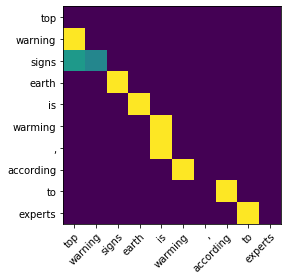

In [0]:
def plot_attn_heatmap(sent):
  
    sent_in_id = [word_to_idx[w] for w in sent.split()]

    with torch.no_grad():
        data = torch.LongTensor([sent_in_id]).to(device)
        weights = ATTNnet(data, return_attn_weights=True)
    
    fig, ax = plt.subplots()

    sent_sp = sent.split()
    ax.set_xticks(np.arange(len(sent_sp)))
    ax.set_yticks(np.arange(len(sent_sp)))
    ax.set_xticklabels(sent_sp)
    ax.set_yticklabels(sent_sp)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")

    plt.imshow(weights[0, :].cpu())

sent = "top warning signs earth is warming , according to experts"
plot_attn_heatmap(sent)

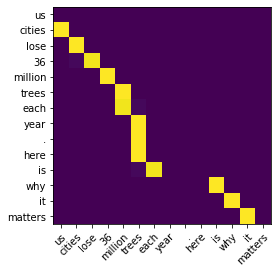

In [0]:
sent = "us cities lose 36 million trees each year . here is why it matters "
plot_attn_heatmap(sent)

Each row of these plots represents the attention weights on the history tokens when the model is trying to predict the next word. For example, the third row of the first plot can be interpreted as the attention weights over "top" and "warning" when predicting "signs"; you'll note that the rest of the row is black (i.e., zero attention on future words). Are these attention maps interpretable? If you (as a human) were solving the same word prediction problem, would you focus on the same words as the ATTNLM does?

  * Yes, the attention maps are interpretable and provide insights on the next word that can appear, given
a history word token. As a human, if I were solving the word prediction problem, I might not always predict the
words as those focused by the ATTNLM. This is because, my training dataset would be larger as compared to
the one used, and the next word attention weights might be different. For example, given the history word token
million, looking at the heat map, I would predict the next word trees with a greater probability, since the attention
weight for the combination million trees is higher as compared to the other alternatives. But, as a human I can
also predict million cities, million year, which according to the heatmap has zero attention weights. Also, I would
use the attention weights calculated for some of the words in the heatmap. For example, given the history word
million, I would not predict the next word token to be either lose, here, since the attention weights for the
combination is zero, which is also intuitive from english grammar.


## Q3. AllenNLP and Probe Tasks (30 points)

### Overview
In this homework, we will be studying probe tasks. Probe tasks are special tasks designed to interpret neural networks (especially, deep networks or word embeddings in NLP). Probe tasks generally use simple classifiers and special datasets to analyze the linguistic content stored in dense representations.

We will also use this assignment to learn AllenNLP (https://github.com/allenai/allennlp), an excellent tool to build deep models for NLP and seamlessly integrate pretrained word embeddings.
(NOTE - This assignment is written using `allennlp` as a Python library. A faster way of using `allennlp` is via JSONNET configuration files, as described [here](https://github.com/allenai/allennlp/blob/master/tutorials/getting_started/walk_through_allennlp/configuration.md). However, learning to use AllenNLP as a library is essential when you want to write custom AllenNLP modules. [This](https://allennlp.org/tutorials) is a good tutorial on using AllenNLP as a library.)

Let's start by setting up Google Drive to download data.

(*Run the cell below. No need to edit any code here.*)

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

success!


### Install AllenNLP

Run the below cell once per session to install `allennlp` locally. You might need to restart the runtime after doing this. No need to re-run it for a different runtime in the same session.

(*Run the cell below. No need to edit any code here.*)

In [0]:
# can take about a minute
!pip install allennlp

### Subject-Verb Agreement

In this assignment, we will design a probe task to test whether word embeddings capture subject-verb agreement. For instance, in English we use the singular verb in this sentence,


*   CORRECT - This assignment **is** very easy.
*   WRONG - This assignment **are** very easy.

Subject-Verb agreement is an important probe task in NLP literature (see [Linzen et al. 2016](https://arxiv.org/abs/1611.01368) and [Gulordova et al. 2018](https://arxiv.org/abs/1803.11138)). We will be using the evaluation set described in  [Linzen et al. 2016](https://arxiv.org/abs/1611.01368), but formulating the problem in a different way.

We start by downloading our dataset. Each `inp` variable represents an English sentence. Each `out` variable has four parts, a) index of verb b) correct verb form c) wrong verb form d) number of agreement attractors (we will not need this data for our experiments, but you should read about them in [Linzen et al. 2016](https://arxiv.org/abs/1611.01368) to help you explain some of the results we obtain).

(*Run the cell below. No need to edit any code here.*)


In [0]:
import pickle

f_agreement = drive.CreateFile({'id': '1S1_RQQHTwwf0F6IM2MmbIr4inINyNbsQ'})
f_agreement.GetContentFile('./agreement.pkl') 


with open('./agreement.pkl', 'rb') as f_in:
    agreement_inp, agreement_output = pickle.load(f_in)


agreement_inp = agreement_inp.strip().split('\n')
agreement_output = agreement_output.strip().split('\n')

data_points = [(inp, out) for inp, out in zip(agreement_inp, agreement_output)]
print("Length of all data = %d" % len(data_points))

# Splitting into 10%-15% train-valid splits. We are not using the full dataset for computational reasons.
# We take a small training dataset since we want to assess the linguistic knowledge stored in pretrained embeddings.
len_data = len(data_points)
train_data = data_points[0 : int(0.1 * len_data)]
valid_data = data_points[int(0.1 * len_data) : int(0.25 * len_data)]
# Actual dataset sizes will be two times this, both the positive and negative example of these sentences
print("train, valid data lengths = %d, %d" % (len(train_data), len(valid_data)))
# print(train_data)
print(train_data[1])


Length of all data = 7489
train, valid data lengths = 748, 1124
('the two versions of the game have identical core gameplay elements , though the extreme version is tweaked to feel more like the arcade mode in the original off-world interceptor . <eos>', '6\thave\thas\t1')


### AllenNLP DatasetReader
We next write a `DatasetReader` in `allennlp`, which is essentially a PyTorch `DatasetReader` with some syntactic sugar. The use of `Field` objects is essential to allow seamless padding and integration with rest of the `allennlp` pipeline.

We will model our probe task as a binary classification task, where given an input sentence, a network has to determine whether the subject-verb agreement is correct or wrong. Notice how we generate two data points per sentence  in the `_read()` function, one with the correct verb (labelled `"correct"`) and the other with the wrong verb (labelled `"wrong"`).

(*Run the cell below. No need to edit any code here.*)

In [0]:
import allennlp
from allennlp.data.dataset_readers import DatasetReader

from allennlp.data import Instance
from allennlp.data.fields import TextField, LabelField

from allennlp.data.token_indexers import TokenIndexer
from allennlp.data.tokenizers import Token

from allennlp.data.vocabulary import Vocabulary

from typing import Iterator, List, Dict

class AgreementDatasetReader(DatasetReader):
    def __init__(self, token_indexers: Dict[str, TokenIndexer] = None) -> None:
        super().__init__(lazy=False)
        self.token_indexers = token_indexers or {"tokens": SingleIdTokenIndexer()}

    def text_to_instance(self, tokens: List[str], label: str) -> Instance:
        tokens = [Token(x) for x in tokens]
        fields = {
            "sentence": TextField(tokens, self.token_indexers),
            "labels": LabelField(label)
        }
        return Instance(fields)

    def _read(self, dataset) -> Iterator[Instance]:
        for inp, out in dataset:
            correct_input = [x for x in inp.split()[:-1]]
            position, correct, wrong, _ = out.split('\t')
            position = int(position)
            # verifying whether input is in correct form
            assert correct_input[position] == correct.lower()
            # yield both the correct and wrong forms of the agreement
            wrong_input = [x for x in correct_input]
            wrong_input[position] = wrong.lower()
            
            yield self.text_to_instance(correct_input, "correct")
            yield self.text_to_instance(wrong_input, "wrong")

### Q3.1 - AllenNLP Model (10 points)

We will now build a simple one-layer classifer on top of average-pooled embeddings.  Notice how the `word_embeddings` are passed as a parameter to the model. This helps abstract the word embeddings outside the model, so it is very simple to swap random vectors with word2vec, GloVE, ELMo or BERT (as we will do in this exercise).

Implement the `forward()` function for this model. Make sure you implement masking correctly, to avoid including masked vectors in the average pooling.

(*Implement the missing sections in the code below. This is the only code you need to implement, so be careful!*)

In [0]:
# requires code
import torch
from allennlp.models import Model
from allennlp.modules.text_field_embedders import TextFieldEmbedder
from allennlp.training.metrics import CategoricalAccuracy
from allennlp.nn.util import get_text_field_mask

class AgreementProbeTask(Model):
    def __init__(self,
                 word_embeddings: TextFieldEmbedder,
                 vocab: Vocabulary) -> None:
        super().__init__(vocab)
        self.word_embeddings = word_embeddings

        self.final_linear = torch.nn.Linear(
            in_features=word_embeddings.get_output_dim(),
            out_features=vocab.get_vocab_size('labels')
        )
        self.criterion = torch.nn.CrossEntropyLoss()
        self.accuracy = CategoricalAccuracy()

    def forward(self,
                sentence: Dict[str, torch.Tensor],
                labels: torch.Tensor = None) -> Dict[str, torch.Tensor]:

        mask = get_text_field_mask(sentence)
        embeddings = self.word_embeddings(sentence)

        # obtain a single vector for each element of the minibatch from the embeddings matrix
        if 'bert' in self.word_embeddings._token_embedders:
            # For BERT, we use the first token [CLS] for classification
            # construct logits using the first embedding vector of the sequence only
            #
            # ENTER CODE HERE 1
            encoder_out = embeddings[:,0,:]
        else:
            # For other models, we will average the embeddings across the sequence dimension
            # Use the `mask` variable to correctly normalize the sum of embeddings by the sequence lengths
            #
            # ENTER CODE HERE 2
            encoder_out = torch.div(torch.sum(embeddings, dim=1), torch.sum(mask, dim=1).float().view(-1,1))
        # Use the linear layer declared in __init__ to construct the logits
        # 
        # ENTER CODE HERE 3
        logits = self.final_linear(encoder_out)

        output = {"logits": logits}

        if labels is not None:
            self.accuracy(logits, labels)
            output["loss"] = self.criterion(logits, labels)

        return output
    
    def get_metrics(self, reset: bool = False) -> Dict[str, float]:
        return {"accuracy": self.accuracy.get_metric(reset)}

### A Primer on Fine-Tuning

Before we analyze some word embeddings, we should understand some terminology (used in rest of the assignment). While using pre-trained weights for a downstream task, typically two approaches are used - 1) they are kept constant during the training 2) they optimized jointly with the rest of the network on the downstream task objective. The first approach (we will call this **frozen embeddings**) saves training cost and is arguably a better indicator of the native linguistic knowledge stored in the original embeddings. The second approach (we will call this **tunable embeddings**) generally leads to the best performance on the downstream task, but often suffers from catastrophic forgetting.

It is an open research problem to fully understand the cases where fine-tuning word embeddings is useful.  [Peters et al. 2019](https://arxiv.org/abs/1903.05987) is a recent research paper on this topic.

### Putting the Pieces Together ...

The code below is an implementation of the training infrastructure in AllenNLP, specific to our application. For the rest of the assignment, you only need to worry about modifying `config` and explaining the results you get. Run the cell below once to register the functions.

*(Run the cell below. No need to edit any code here.)*

In [0]:
from allennlp.modules.token_embedders import (
    Embedding,
    ElmoTokenEmbedder,
    PretrainedBertEmbedder
)
from allennlp.modules.token_embedders.embedding import _read_pretrained_embeddings_file
from allennlp.modules.text_field_embedders import BasicTextFieldEmbedder
from allennlp.data.iterators import BucketIterator
from allennlp.training.trainer import Trainer

from allennlp.data.token_indexers import (
    SingleIdTokenIndexer,
    ELMoTokenCharactersIndexer,
    PretrainedBertIndexer
)

import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

def reset_weights_fn(m):
    if hasattr(m, "reset_parameters"):
        m.reset_parameters()

def run_experiment(config):
    embedding_type = config['embedding_type']
    embedding_size = config['embedding_size']
    urls = config['urls']
    tunable = config['tunable']
    batch_size = config['batch_size']
    num_epochs = config['num_epochs']
    reset_weights = config['reset_weights']
    
    # A token indexer is necessary to inform the DatasetReader the indexing process
    if embedding_type in ['random', 'glove']:
        logger.info("Using a single ID token indexer...")
        token_indexers = {
            'tokens': SingleIdTokenIndexer()
        }

    elif embedding_type == 'elmo':
        logger.info("Using elmo character token indexer...")
        token_indexers = {
            'elmo': ELMoTokenCharactersIndexer()
        }

    elif embedding_type == 'bert':
        logger.info("Using bert token indexer...")
        token_indexers = {
            'bert': PretrainedBertIndexer('bert-base-uncased')
        } 

    else:
        logger.info("Invalid embeddings type, quitting...")
        return

    # Loading training and validation datasets via our reader
    reader = AgreementDatasetReader(token_indexers)
    train_dataset = reader.read(train_data)
    valid_dataset = reader.read(valid_data)
    # `vocab` contains both the input vocab and output label space
    vocab = Vocabulary.from_instances(train_dataset + valid_dataset)

    if embedding_type == 'random':
        logger.info("Using random embeddings...")
        token_embedding = Embedding(
            num_embeddings=vocab.get_vocab_size('tokens'),
            embedding_dim=embedding_size,
            trainable=tunable
        )
        word_embeddings = BasicTextFieldEmbedder({"tokens": token_embedding})

    elif embedding_type == 'glove':
        logger.info("Using glove embeddings...")
        weight = _read_pretrained_embeddings_file(
            urls[0],
            embedding_size,
            vocab
        )
        token_embedding = Embedding(
            num_embeddings=vocab.get_vocab_size('tokens'),
            weight=weight,
            embedding_dim=embedding_size,
            trainable=tunable
        )
        word_embeddings = BasicTextFieldEmbedder({"tokens": token_embedding})   

    elif embedding_type == 'elmo':
        logger.info("Using elmo embeddings...")
        elmo_token_embedding = ElmoTokenEmbedder(
            urls[0], urls[1], dropout=0, requires_grad=tunable
        )
        if reset_weights is True:
            logger.info("Resetting elmo weights...")
            
            elmo_token_embedding.apply(reset_weights_fn)
        word_embeddings = BasicTextFieldEmbedder({"elmo": elmo_token_embedding})
    
    elif embedding_type == 'bert':
        logger.info("Using bert embeddings...")
        bert_token_embedding = PretrainedBertEmbedder(
            'bert-base-uncased', requires_grad=tunable
        )
        if reset_weights is True:
            logger.info("Resetting bert weights...")
            bert_token_embedding.apply(reset_weights_fn)
        word_embeddings = BasicTextFieldEmbedder(
            {"bert": bert_token_embedding},
            {"bert": ['bert']},
            allow_unmatched_keys=True
        )

    else:
        logger.info("Invalid embeddings type, quitting...")
        return


    model = AgreementProbeTask(word_embeddings, vocab)
    
    if torch.cuda.is_available():
        cuda_device = 0
        model = model.cuda(cuda_device)
    else:
        cuda_device = -1

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # A bucket iterator is needed to sort the data by sequence length and reduce padding overhead
    iterator = BucketIterator(batch_size=batch_size,
                              sorting_keys=[("sentence", "num_tokens")])
    iterator.index_with(vocab)

    # This function wraps all the whole training loop into a single object
    trainer = Trainer(model=model,
                      optimizer=optimizer,
                      iterator=iterator,
                      train_dataset=train_dataset,
                      validation_dataset=valid_dataset,
                      patience=20,
                      validation_metric='+accuracy',
                      num_epochs=num_epochs,
                      cuda_device=cuda_device)
    return trainer.train()

###  Q3.2 - GloVE Embeddings (5 points)

We are ready to train our model! We will start by training a baseline classification model which will use GLoVE embeddings. We will test both cases where the GLoVE embeddings are trainable and fixed. 

1. Try varying the embedding size (50, 100, 300) and report **early stopping** validation accuracy in the text box below. AllenNLP will provide this information to you at the end of training. Keep the embeddings frozen.
2. Next, report the performance for tunable embeddings.
3. Explain your observations / trends. What do you notice about training time / number of epochs across different runs? You are encouraged to think critically about the trends you notice in this question and the following questions. Most of the points awarded will depend on your explanations.

(NOTE - The loss and accuracy values are in a similar range in some parts of this assignment, read the logs carefully!)

*Hint - As a verification of your implementation, your 300 dimensional tunable accuracy should about 61%. This could vary slightly due to stochasticity.*


The three sizes of GloVE embeddings that we are going to use can be found here -


*  50 dimensional = https://s3-us-west-2.amazonaws.com/allennlp/datasets/glove/glove.6B.50d.txt.gz
*  100 dimensional = https://s3-us-west-2.amazonaws.com/allennlp/datasets/glove/glove.6B.100d.txt.gz
*  300 dimensional = https://s3-us-west-2.amazonaws.com/allennlp/datasets/glove/glove.840B.300d.txt.gz

**For your reference, the largest GloVe setting (300, tunable) takes about 3 minutes 30 seconds to finish finetuning**




### Enter your answers here


**Frozen Embeddings**  
50 dimensional = 0.5533807829181495

100 dimensional =  0.568950177935943

300 dimensional =  0.5720640569395018




**Tunable Embeddings**  
50 dimensional =  0.5769572953736655

100 dimensional =  0.5945302431001103

300 dimensional =  0.604982206405694

**Explain your results here**
We can see that the early stopping validation accuracies increases with the increase in word embedding size for both frozen as well as tunable embeddings. Its also observed that the tunable embeddings with 300 dimensions takes lower epoch to converge to optimal solution as compared to frozen embeddings. We can safely say here that the model performs better when the embeddings are tuned to the training data as compared to the pretrained embeddings tuned on a generic data. The increase in the validation accuracy post tuning the embeddings can be observed by comparing the individual accuracies for each dimensions of the word embeddings between frozen and tunable. We can also obsserve that the number of epochs and the training time decrease with the increase in dimensions of the tunable embedding model.


In [0]:
 config = {
    'embedding_type': 'glove',
    'embedding_size': 300,
    'urls': [
        # 'https://s3-us-west-2.amazonaws.com/allennlp/datasets/glove/glove.6B.50d.txt.gz'
        # 'https://s3-us-west-2.amazonaws.com/allennlp/datasets/glove/glove.6B.100d.txt.gz'
        'https://s3-us-west-2.amazonaws.com/allennlp/datasets/glove/glove.840B.300d.txt.gz'
    ],
    'tunable': True,
    'batch_size': 100,
    'num_epochs': 100,
    'reset_weights': True
}
run_experiment(config)

###  Q3.3 - Contextualized Word Embeddings - ELMo (5 points)

Having studied standard word embeddings, we are now going to explore modern sentence embedding techniques such as ELMo.

1. Run the model with frozen and tunable ELMo embeddings and report the **early stopping** validation accuracy results as in Question 1.2.
2. Run a baseline ELMo model with randomly initialized weights (Use the `reset_weights` configuration) and report the results. Consider both settings - frozen embeddings and tunable embeddings.
3. Explain your results, compare it with GloVE embeddings. Why was this model so slow?

**For your reference, the worst case of ELMo finetuning (random weights, tunable) takes about 1 hour and 20 minutes.**

### Enter your answers here



**Frozen Embeddings**  
random weights =  0.5440391459074733

pretrained weights = 0.6619217081850534



**Tunable Embeddings**  
random weights =  0.5057829181494662

pretrained weights = 0.8830071174377224


**Explain your results here**

 * In ELMo models, representations are character based while GloVE embeddings are word-based, which implies higher number of trainable parameters in ELMo models as to GloVE embedding models. Hence ELMo models are slower to train than GloVE embedding models.Thus the number of epochs and training time are higher for ELMo models.
 * It's observed that the validation accuracy is higher for ELMo as compared to GloVE embedding models in both frozen embeddings and tunable embeddings. This is perhaps because the word embeddings in ELMo account for the distribution of the context in the sentence, which is not accounted for in GloVE embedding models.
 * We can also observe that the validation accuracy is higher for pretrained weights in both cases when the embeddings are frozen and tunable. We can say that the ELMo was better pretrained as compared to our training dataset.
 * It can be seen that pretrained weights with tunable embeddings have a higher validation accuracy than the pretrained weights with fixed embeddings. Its expected since the model is tuned to a particular task of Subject-Verb agreement which would have a better accuracy than the model trained in a generic manner.




In [0]:
config = {
    'embedding_type': 'elmo',
    'embedding_size': 1024,
    'urls': [
        'https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json',
        'https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5'
    ],
    'tunable': True,
    'batch_size': 100,
    'num_epochs': 100,
    'reset_weights': False
}

run_experiment(config)


###  Q3.4 - Contextualized Word Embeddings - BERT (5 points)

As our final step, we will analyze representations learnt from BERT.

1. Run the model with frozen BERT embeddings and report the **early stopping** validation accuracy as earlier.
2. Run a baseline BERT model with randomly initialized weights (Use the `reset_weights` configuration). Consider only the frozen weight setting.
3. Explain your results, compare it with GloVE and ELMo embeddings. Why was this faster (or slower) than ELMo?



(Note - Fine-tuning BERT was crashing colab, probably due to a memory error. Feel free to check if this is the case and find any workarounds for this. Maybe, vary the batch_size)

**For your references, finetuning BERT with randomly initialized weights takes about 30 minutes**

### Enter your answers here





**Frozen Embeddings**  
random weights = 0.5618327402135231

pretrained weights = 0.6650355871886121


**Explain your results here**

 * The validation accuracy in case of the BERT model is closer to the validation accuracy of the ELMo embedding models, which is much higher than those of the GLoVE embedding models. This is expected as the ELMo and GloVE models consider the distribution of the contexts in the data which GloVE embedding models do not.
 * As seen from the training times and the number of epoch for GloVE, BERT, and ELMo, it can be said that ELMo takes the longest time to train and GloVE models are the fastest while BERT is in between them. 
 * We can also say that randomly initialized weights in ELMo trains much slower than the case of BERT as BERT can be trained in parallel with the attention mechanism in place where as ELMo has to be trained sequentially. GloVE models are the fastest as the next word is predicted only based on the probability distribution of the entire vocabulary with no contexts in mind.
 * In the case of randomly initialized weights for ELMo and BERT, they take similar times to train as compared to the case of pretrained weights where the BERT model is slower to train than ELMo model.


In [0]:
config = {
    'embedding_type': 'bert',
    'embedding_size': 768,
    'urls': [],
    'tunable': False,
    'batch_size': 100,
    'num_epochs': 100,
    'reset_weights': True
}
run_experiment(config)

###  Q3.5 - Sentence Composition (5 points)

One drawback of our analysis was the word embedding aggregation algorithm (averaging) used to build the sentence embedding was lossy. Is there a better way to aggregate sentences to avoid being lossy and improve the performance of frozen embedding models? (Please give at least three solutions to get full credits)

### Enter your answer here

* We can use a Smooth Inverse Frequency (SIF) relation where we compute the weighted average of the word vectors in the sentence and then mask the projections of the average vector on the first singular vector.
* A TF-IDF weighting scheme can also be used to reduce the lossy behavior and improve the model's performance.
* Another way is to concatenate the word-embeddings and apply a linear function layer on it to further improve its performance.
* Max-pooling is another technique one can apply to the word-embeddings, which ensemble the word embeddings with lower loss compared to the averaging of the word embeddings.